In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the data from the CSV files
timestamps_df = pd.read_csv('timestamps.csv')
thomas_timestamp_df = pd.read_csv('Thomas_timestamp.csv')

# Display the first few rows of each dataframe to understand their structure
print(timestamps_df.head())
print(thomas_timestamp_df.head())

                  timestamp
0  2017-01-01T21:51:55.119Z
1  2017-01-01T21:43:09.146Z
2  2017-01-01T21:39:00.693Z
3  2017-01-01T21:34:51.247Z
4  2017-01-01T21:30:03.065Z
                     ts
0  2019-04-28T18:40:13Z
1  2019-04-28T18:55:44Z
2  2019-04-28T18:55:55Z
3  2019-04-28T19:25:47Z
4  2019-04-28T19:25:53Z


In [24]:
# Convert timestamps to datetime objects with mixed format handling
timestamps_df['timestamp'] = pd.to_datetime(timestamps_df['timestamp'], format='mixed')
thomas_timestamp_df['ts'] = pd.to_datetime(thomas_timestamp_df['ts'], format='mixed')

# Display the first few rows again to verify the conversion
print(timestamps_df.head())
print(thomas_timestamp_df.head())



                         timestamp
0 2017-01-01 21:51:55.119000+00:00
1 2017-01-01 21:43:09.146000+00:00
2 2017-01-01 21:39:00.693000+00:00
3 2017-01-01 21:34:51.247000+00:00
4 2017-01-01 21:30:03.065000+00:00
                         ts
0 2019-04-28 18:40:13+00:00
1 2019-04-28 18:55:44+00:00
2 2019-04-28 18:55:55+00:00
3 2019-04-28 19:25:47+00:00
4 2019-04-28 19:25:53+00:00


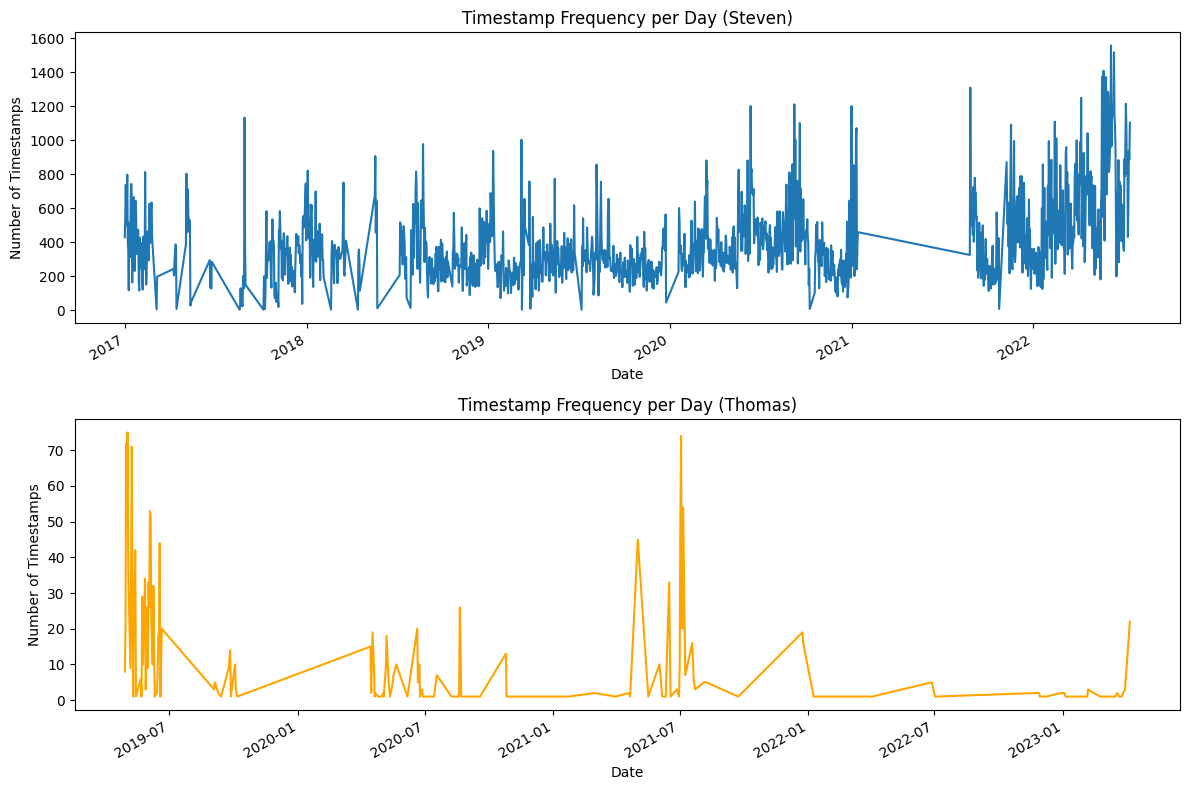

In [25]:
# Set up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot for the first dataset
timestamps_df['timestamp'].dt.floor('d').value_counts().sort_index().plot(ax=axes[0], kind='line')
axes[0].set_title('Timestamp Frequency per Day (Steven)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Timestamps')

# Plot for the second dataset
thomas_timestamp_df['ts'].dt.floor('d').value_counts().sort_index().plot(ax=axes[1], kind='line', color='orange')
axes[1].set_title('Timestamp Frequency per Day (Thomas)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Timestamps')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Compared to mine, Thomas's timestamps are in a much smaller time window than mine. Will make a excerpt of my timestamps to match Thomas's time span

In [50]:
# Find the minimum and maximum timestamps in Thomas_timestamp.csv
min_ts_thomas = thomas_timestamp_df['ts'].min()
max_ts_thomas = thomas_timestamp_df['ts'].max()

# Filter timestamps.csv to match this time window and create a copy
filtered_timestamp_df = timestamps_df[(timestamps_df['timestamp'] >= min_ts_thomas) & (timestamps_df['timestamp'] <= max_ts_thomas)].copy()

print("from ", min_ts_thomas, "to ", max_ts_thomas)
print(filtered_timestamp_df.head())
print(filtered_timestamp_df.tail())

max_ts_steven = filtered_timestamps_df['timestamp'].max()

filtered_thomas_timestamp_df = thomas_timestamp_df[(thomas_timestamp_df['ts'] <= max_ts_steven)].copy()
print(filtered_thomas_timestamp_df.head())
print(filtered_thomas_timestamp_df.tail())

from  2019-04-28 18:40:13+00:00 to  2023-04-07 18:13:08+00:00
                             timestamp  hour day_of_week  month
86002 2019-04-28 19:05:47.324000+00:00    19      Sunday  April
86003 2019-04-28 19:31:56.852000+00:00    19      Sunday  April
86004 2019-04-28 19:32:29.457000+00:00    19      Sunday  April
86005 2019-04-28 19:32:43.434000+00:00    19      Sunday  April
86006 2019-04-28 19:35:25.832000+00:00    19      Sunday  April
                              timestamp  hour day_of_week month
541189 2022-07-15 21:12:08.752000+00:00    21      Friday  July
541190 2022-07-15 21:13:29.989000+00:00    21      Friday  July
541191 2022-07-15 21:16:36.103000+00:00    21      Friday  July
541192 2022-07-15 21:21:45.049000+00:00    21      Friday  July
541193 2022-07-15 21:22:46.799000+00:00    21      Friday  July
                         ts  hour day_of_week  month
0 2019-04-28 18:40:13+00:00    18      Sunday  April
1 2019-04-28 18:55:44+00:00    18      Sunday  April
2 2019-04-2

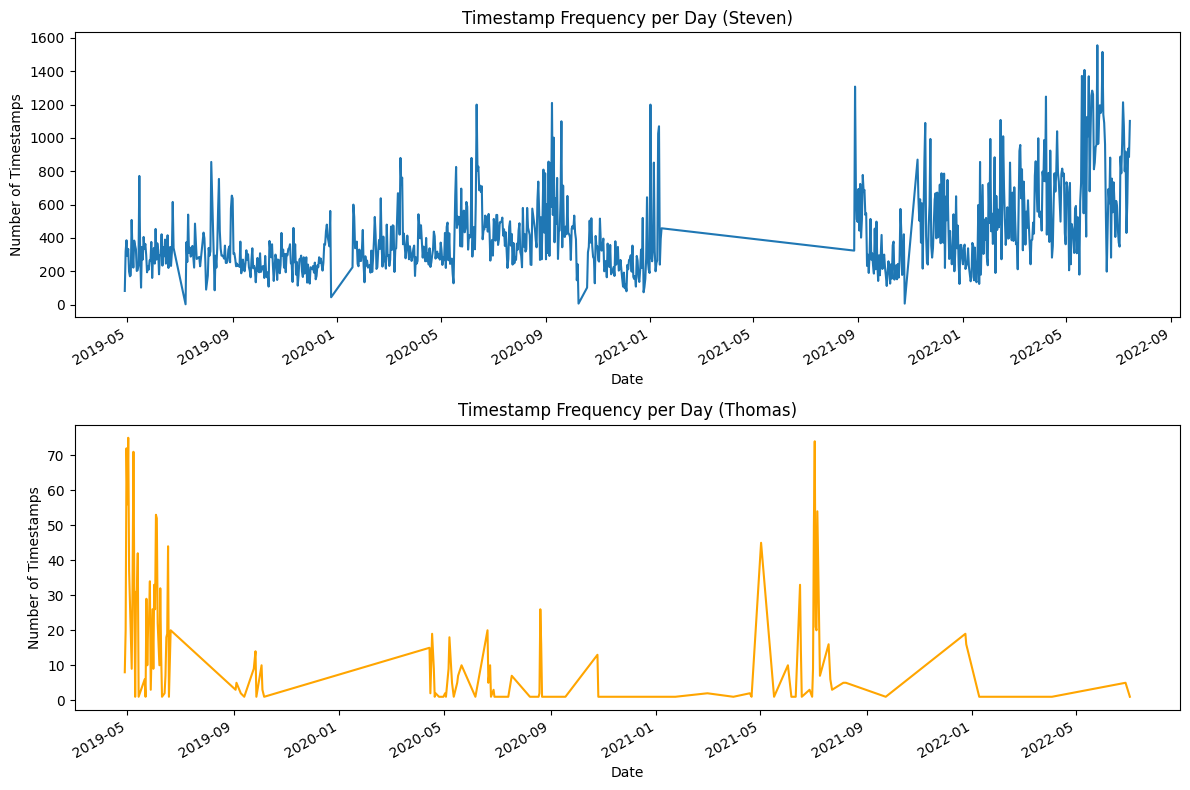

In [51]:
# Set up the figure and axes for two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))

# Plot for the first dataset
filtered_timestamp_df['timestamp'].dt.floor('d').value_counts().sort_index().plot(ax=axes[0], kind='line')
axes[0].set_title('Timestamp Frequency per Day (Steven)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Timestamps')

# Plot for the second dataset
filtered_thomas_timestamp_df['ts'].dt.floor('d').value_counts().sort_index().plot(ax=axes[1], kind='line', color='orange')
axes[1].set_title('Timestamp Frequency per Day (Thomas)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Timestamps')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

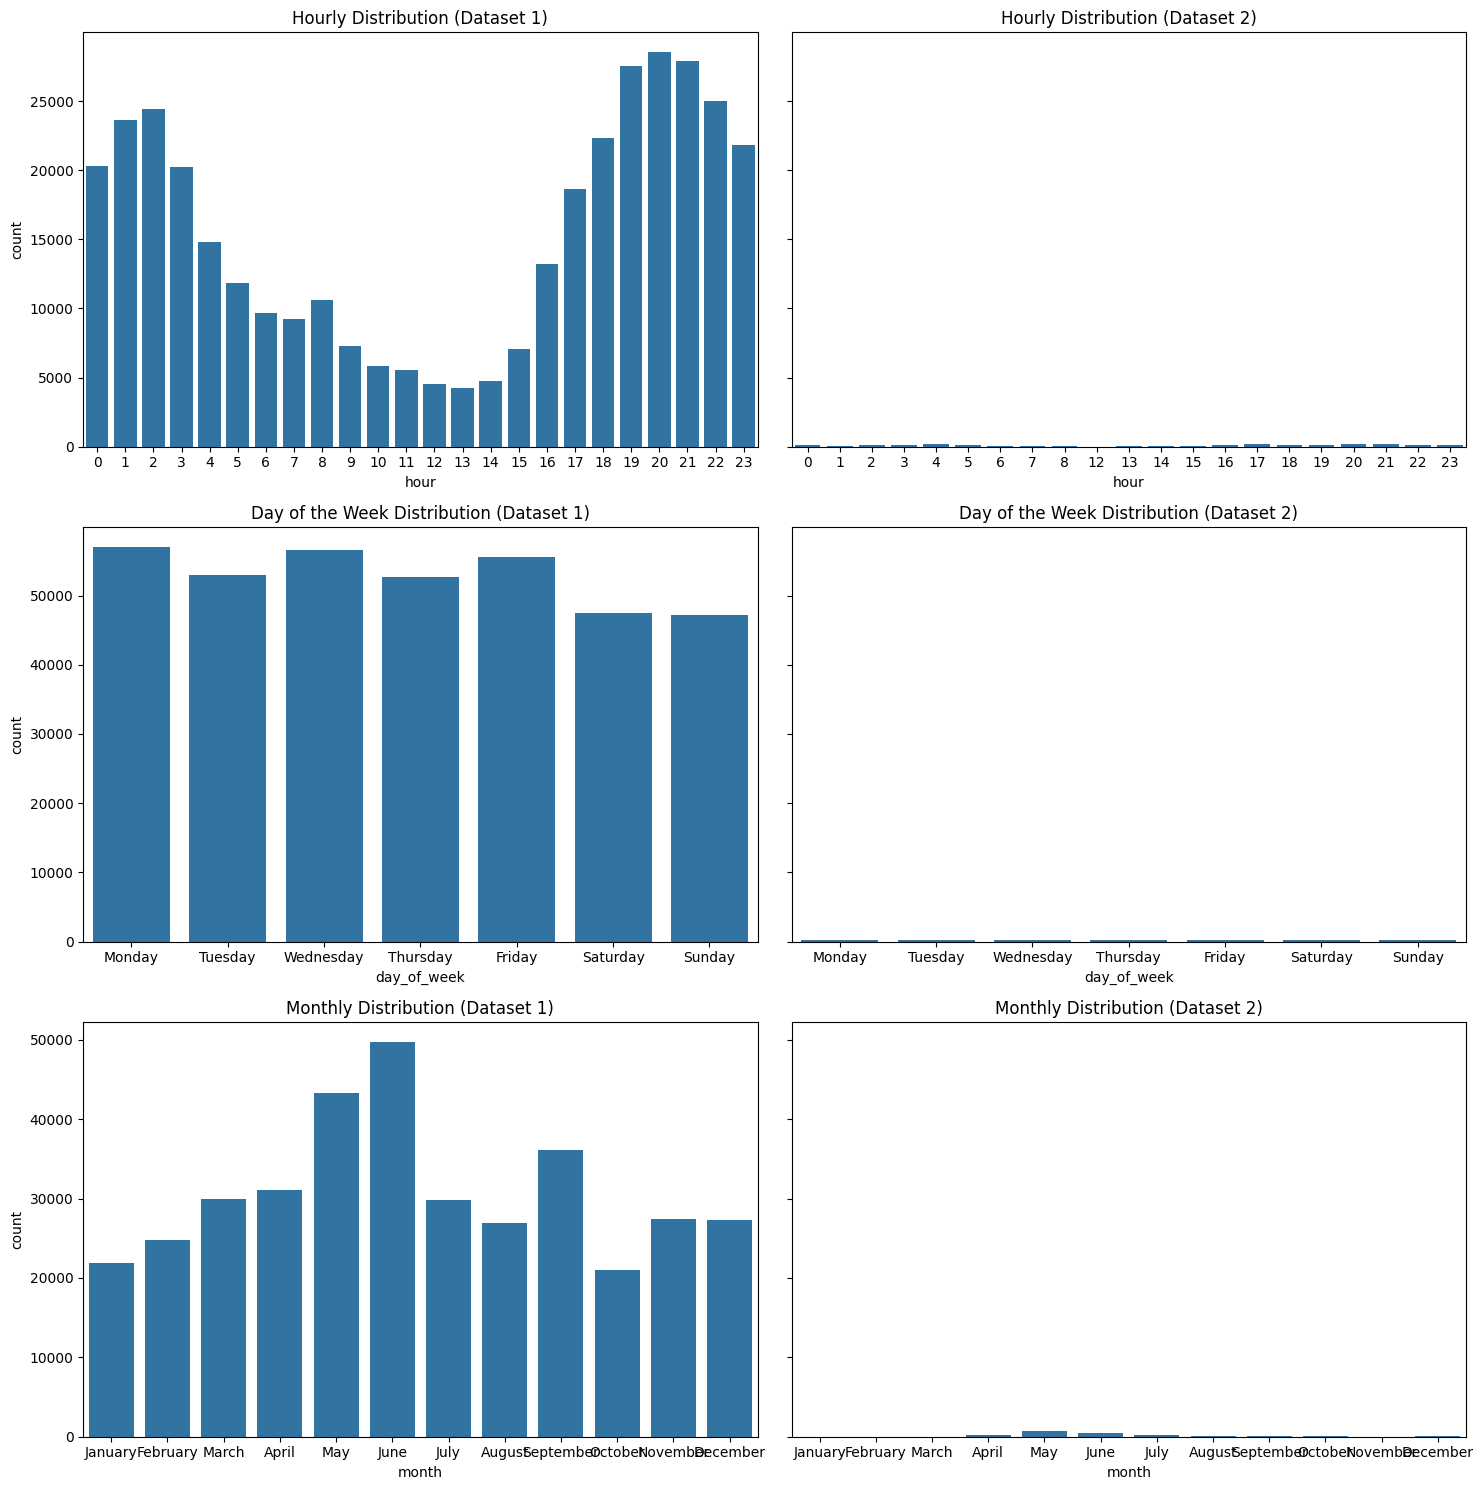

In [54]:
# Extract hour, day of the week, and month for both datasets
filtered_timestamp_df['hour'] = filtered_timestamp_df['timestamp'].dt.hour
filtered_timestamp_df['day_of_week'] = filtered_timestamp_df['timestamp'].dt.day_name()
filtered_timestamp_df['month'] = filtered_timestamp_df['timestamp'].dt.month_name()

filtered_thomas_timestamp_df['hour'] = thomas_timestamp_df['ts'].dt.hour
filtered_thomas_timestamp_df['day_of_week'] = thomas_timestamp_df['ts'].dt.day_name()
filtered_thomas_timestamp_df['month'] = thomas_timestamp_df['ts'].dt.month_name()

# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15), sharey='row')

# Define order for days of the week and months
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Plotting for the first dataset (timestamps.csv)
sns.countplot(x='hour', data=filtered_timestamp_df, ax=axes[0, 0], )
sns.countplot(x='day_of_week', data=filtered_timestamp_df, ax=axes[1, 0], order=days_order)
sns.countplot(x='month', data=filtered_timestamp_df, ax=axes[2, 0], order=months_order)

axes[0, 0].set_title('Hourly Distribution (Dataset 1)')
axes[1, 0].set_title('Day of the Week Distribution (Dataset 1)')
axes[2, 0].set_title('Monthly Distribution (Dataset 1)')

# Plotting for the second dataset (Thomas_timestamp.csv)
sns.countplot(x='hour', data=filtered_thomas_timestamp_df, ax=axes[0, 1])
sns.countplot(x='day_of_week', data=filtered_thomas_timestamp_df, ax=axes[1, 1], order=days_order)
sns.countplot(x='month', data=filtered_thomas_timestamp_df, ax=axes[2, 1], order=months_order)

axes[0, 1].set_title('Hourly Distribution (Dataset 2)')
axes[1, 1].set_title('Day of the Week Distribution (Dataset 2)')
axes[2, 1].set_title('Monthly Distribution (Dataset 2)')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


Since quantity difference is too big, doing analysis individually now.

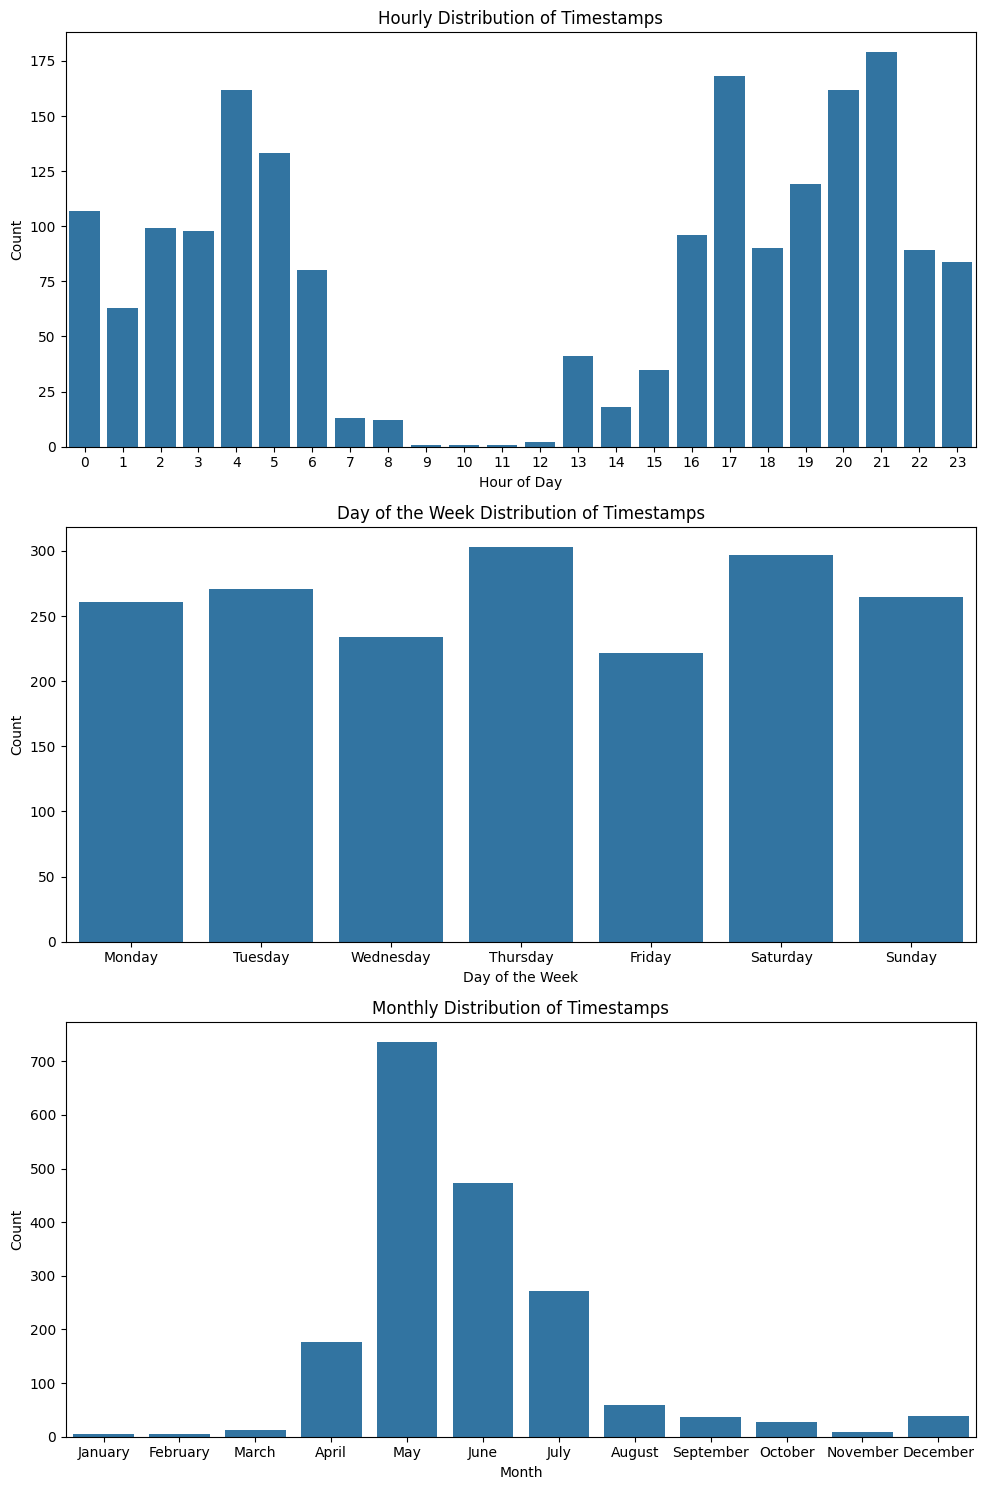

In [40]:
# Set up the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Define order for days of the week and months
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Hourly distribution
sns.countplot(x='hour', data=thomas_timestamp_df, ax=axes[0])
axes[0].set_title('Hourly Distribution of Timestamps')
axes[0].set_xlabel('Hour of Day')
axes[0].set_ylabel('Count')

# Day of the week distribution
sns.countplot(x='day_of_week', data=thomas_timestamp_df, ax=axes[1], order=days_order)
axes[1].set_title('Day of the Week Distribution of Timestamps')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Count')

# Monthly distribution
sns.countplot(x='month', data=thomas_timestamp_df, ax=axes[2], order=months_order)
axes[2].set_title('Monthly Distribution of Timestamps')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The pattern of hourly distribution seems to match with mine. However, his has far less samples, so I assume it's not the exact same source of data. That said, I do think this is location related data of some kind.